# Lokal Operator

*   Operator Sobel: Sobel memberikan bobot lebih pada piksel tengah, sehingga hasilnya cenderung lebih halus dibandingkan Prewitt.

*   Operator Prewitt: Kernel Prewitt memiliki bobot seragam, sehingga lebih sederhana dibandingkan Sobel.

*   Operator Canny: Canny menggunakan histeresis untuk menghubungkan tepi yang terputus, menghasilkan deteksi yang lebih bersih dan akurat.



In [1]:
# Impor library yang diperlukan
import cv2                               # Library OpenCV untuk pengolahan citra digital
import numpy as np                       # Library NumPy untuk operasi numerik dan manipulasi array
import matplotlib.pyplot as plt          # Library Matplotlib untuk visualisasi gambar
from google.colab import files           # Modul untuk mengunggah file di Google Colab

In [2]:
# Mengunggah gambar dari lokal
print("Unggah gambar yang ingin diproses (format .jpg, .png, dll.)")  # Menampilkan pesan untuk meminta pengguna mengunggah gambar
uploaded = files.upload()                # Mengunggah gambar dan menyimpannya dalam variabel uploaded (berupa dictionary)

Unggah gambar yang ingin diproses (format .jpg, .png, dll.)


Saving lena 2.0.jpg to lena 2.0.jpg


In [3]:
# Memuat gambar yang diunggah
filename = next(iter(uploaded))          # Mengambil nama file pertama dari dictionary uploaded
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)  # Memuat gambar dalam mode Grayscale untuk mempermudah deteksi tepi

In [4]:
# Menerapkan operator Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Menghitung gradien horizontal (x) menggunakan Sobel dengan kernel 3x3
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Menghitung gradien vertikal (y) menggunakan Sobel dengan kernel 3x3
sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Menggabungkan gradien x dan y untuk mendapatkan magnitudo tepi

In [5]:
# Menerapkan operator Prewitt (menggunakan kernel manual)
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Definisi kernel Prewitt untuk gradien horizontal
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Definisi kernel Prewitt untuk gradien vertikal
prewitt_x = cv2.filter2D(image, -1, prewitt_kernel_x)  # Menerapkan kernel horizontal pada citra
prewitt_y = cv2.filter2D(image, -1, prewitt_kernel_y)  # Menerapkan kernel vertikal pada citra
prewitt_combined = cv2.magnitude(prewitt_x.astype(np.float64), prewitt_y.astype(np.float64))  # Menggabungkan gradien dan konversi tipe data

In [6]:
# Menerapkan operator Canny
canny_edges = cv2.Canny(image, 100, 200)  # Deteksi tepi menggunakan Canny dengan ambang batas bawah 100 dan atas 200

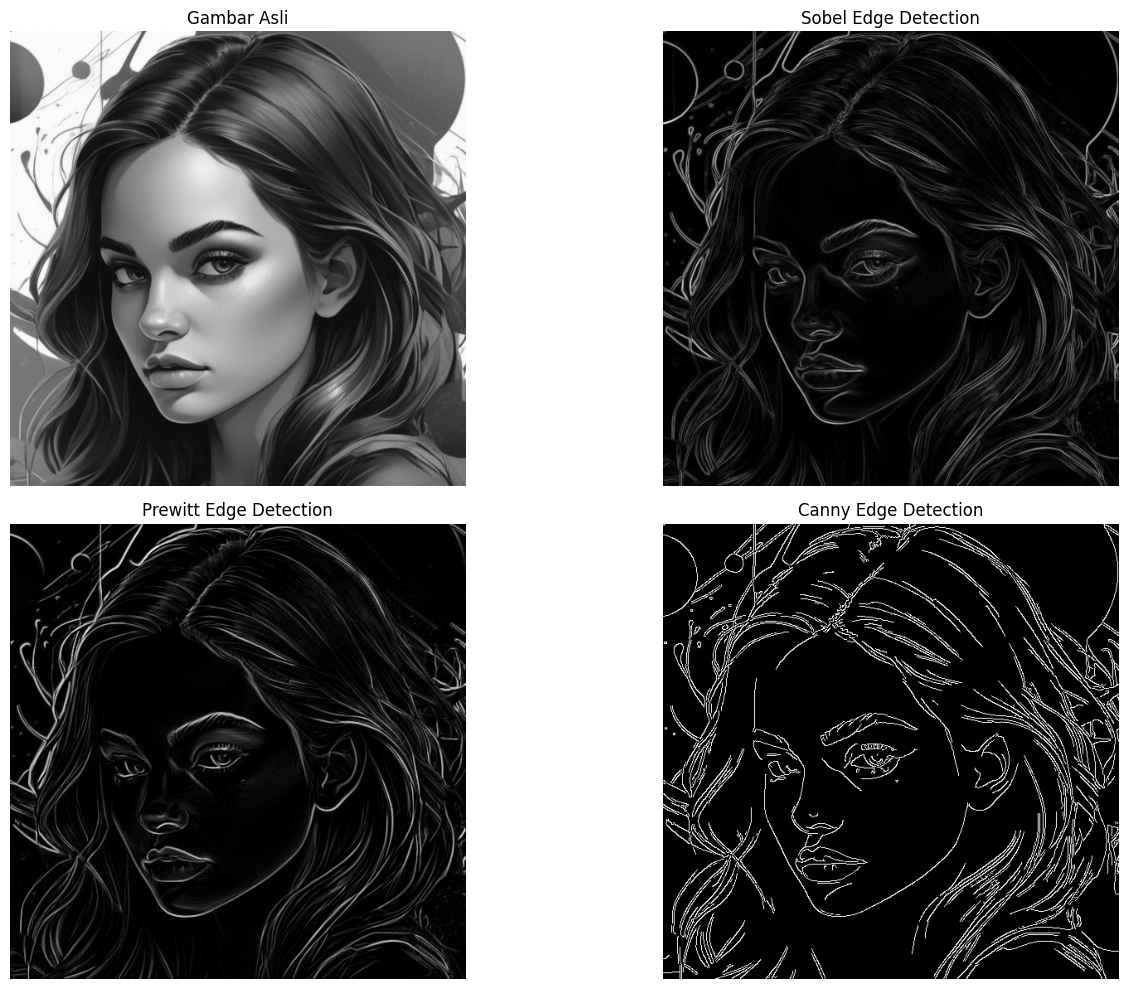

In [7]:
# Menampilkan hasil dalam satu frame
plt.figure(figsize=(15, 10))             # Membuat figure dengan ukuran 15x10 inci untuk menampung empat subplot

# Gambar Asli
plt.subplot(2, 2, 1)                     # Membuat subplot pada posisi 1 (baris 2, kolom 2, indeks 1)
plt.imshow(image, cmap='gray')           # Menampilkan gambar asli dalam skala abu-abu
plt.title('Gambar Asli')                 # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu untuk tampilan yang lebih bersih

# Hasil Sobel
plt.subplot(2, 2, 2)                     # Membuat subplot pada posisi 2
plt.imshow(sobel_combined, cmap='gray')  # Menampilkan hasil deteksi tepi Sobel
plt.title('Sobel Edge Detection')        # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu

# Hasil Prewitt
plt.subplot(2, 2, 3)                     # Membuat subplot pada posisi 3
plt.imshow(prewitt_combined, cmap='gray')  # Menampilkan hasil deteksi tepi Prewitt
plt.title('Prewitt Edge Detection')      # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu

# Hasil Canny
plt.subplot(2, 2, 4)                     # Membuat subplot pada posisi 4
plt.imshow(canny_edges, cmap='gray')     # Menampilkan hasil deteksi tepi Canny
plt.title('Canny Edge Detection')        # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu

plt.tight_layout()                       # Mengatur layout agar subplot tidak saling tumpang tindih
plt.show()                               # Menampilkan semua subplot dalam satu frame